In [1]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

https://lernapparat.de/debug-device-assert/

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
from torch import optim

In [2]:
import sys
sys.path.insert(1, "../../../")

In [3]:
from train import *
from data_preprocessing import *
from evaluation import *
from data_augmentation import Enhanced
import albumentations as A
from Models.yolov8cls_path import Model

In [4]:
if torch.cuda.is_available():
    device=torch.device('cuda')
else:
    device=torch.device('cpu') 

In [5]:
model = Model(num_classes=10, 
              residual_connection=True, 
              CSP=True, 
              add_hidden=True,
              classifyV8=True,
              bottleneck=1.0, 
              variant='s', 
              device=device, 
              dtype=torch.float32)

In [6]:
data_path = '../../../../datasets/imagenette2/'
norms_path = os.path.join(data_path, 'norms.json')

In [7]:
means = get_means(path=norms_path, train_loader=None)
stds = get_stds(path=norms_path, train_loader=None)

Means are: [0.44969913363456726, 0.44868946075439453, 0.45163223147392273]
stds are: [0.28648287057876587, 0.28796446323394775, 0.2865694761276245]



Profiling your personal module 
https://pytorch.org/tutorials/beginner/profiler.html

https://discuss.pytorch.org/t/how-to-prevent-overfitting/1902
Right now, with my augmented dataset, at epoch 8, I am getting a testset Top1 accuracy of 45% but a trainset Top1 accuracy of 69%.

You should strongly consider data augmentation in some meaningful way. If you’re attempting to do classification then think about what augmentations might add useful information and help distinguish classes in your dataset. In one of my cases, introducing background variation increased recognition rate by over 50%. Basically, with small datasets there is too much overfitting so you want the network to learn real-world distinctions vs. irrelevant artifacts like backgrounds / shadows etc.

In [14]:
transformations = transforms.Compose([transforms.RandomResizedCrop((224, 224)),
                                              Enhanced(),
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean=means, std=stds)])
transformations_val = transforms.Compose([transforms.Resize((224, 224)),
                                                 transforms.ToTensor(),
                                                 transforms.Normalize(mean=means, std=stds)
                                                 ])

In [15]:
train_dataset = ImageNetSubset(path=data_path, train=True, transform=transformations, half=False, show=False)
val_dataset = ImageNetSubset(path=data_path, train=False, transform=transformations_val, half=False, show=False)

In [16]:
epochs=10
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=1)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=1)

In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)

In [18]:
loss_fn = nn.NLLLoss()

In [19]:
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [20]:
history, gradient_stats = train(epochs, train_loader, val_loader, model, optimizer, loss_fn, scheduler, outputs_path='../../log/YOLOv8cls-version-5/training/')

2024-12-07 14:06:00.224155 Epoch 1 
2024-12-07 14:06:09.869190 Batch 15 
2024-12-07 14:06:16.042379 Batch 30 
2024-12-07 14:06:22.022253 Batch 45 
2024-12-07 14:06:28.492673 Batch 60 
2024-12-07 14:06:34.574045 Batch 75 
2024-12-07 14:06:40.752027 Batch 90 
2024-12-07 14:06:46.905772 Batch 105 
2024-12-07 14:06:53.112687 Batch 120 
2024-12-07 14:06:59.125117 Batch 135 
[Train] Accuracy: 26.9722%, Loss per batch: 2.0187
2024-12-07 14:07:12.202801 Batch 15 
2024-12-07 14:07:16.356016 Batch 30 
2024-12-07 14:07:21.137501 Batch 45 
2024-12-07 14:07:25.524896 Batch 60 
[Val] Accuracy: 37.2994%, loss per batch: 1.7506
Epoch 1: SGD lr 0.0100 -> 0.0090
2024-12-07 14:07:26.510718 Epoch 2 
2024-12-07 14:07:35.331384 Batch 15 
2024-12-07 14:07:41.556997 Batch 30 
2024-12-07 14:07:48.011367 Batch 45 
2024-12-07 14:07:54.167854 Batch 60 
2024-12-07 14:08:00.364776 Batch 75 
2024-12-07 14:08:06.556103 Batch 90 
2024-12-07 14:08:12.763918 Batch 105 
2024-12-07 14:08:18.916852 Batch 120 
2024-12-07 14

In [21]:
history, gradient_stats = train(epochs, train_loader, val_loader, model, optimizer, 
                                loss_fn, scheduler, outputs_path='../../log/YOLOv8cls-version-5/training/', resume=True)

C:\Me\PJAIT\Thesis\Code\yolov2-to-yolov8\Backbone experiments\YOLOv8s-cls Path\Version 5\../../..\train.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.lo

2024-12-07 14:20:38.658041 Epoch 11 
2024-12-07 14:20:47.712814 Batch 15 
2024-12-07 14:20:54.171735 Batch 30 
2024-12-07 14:21:00.653908 Batch 45 
2024-12-07 14:21:07.491037 Batch 60 
2024-12-07 14:21:13.954850 Batch 75 
2024-12-07 14:21:20.843946 Batch 90 
2024-12-07 14:21:27.246901 Batch 105 
2024-12-07 14:21:33.677726 Batch 120 
2024-12-07 14:21:40.244739 Batch 135 
[Train] Accuracy: 63.502%, Loss per batch: 1.0965
2024-12-07 14:21:53.246922 Batch 15 
2024-12-07 14:21:57.672707 Batch 30 
2024-12-07 14:22:02.717983 Batch 45 
2024-12-07 14:22:07.347411 Batch 60 
[Val] Accuracy: 68.5605%, loss per batch: 0.9629
Epoch 11: SGD lr 0.0035 -> 0.0031
2024-12-07 14:22:08.266599 Epoch 12 
2024-12-07 14:22:17.505447 Batch 15 
2024-12-07 14:22:24.095250 Batch 30 
2024-12-07 14:22:30.704912 Batch 45 
2024-12-07 14:22:36.968797 Batch 60 
2024-12-07 14:22:43.579601 Batch 75 
2024-12-07 14:22:50.042921 Batch 90 
2024-12-07 14:22:56.974166 Batch 105 
2024-12-07 14:23:03.322007 Batch 120 
2024-12-07 

<module 'matplotlib.pyplot' from 'C:\\Vstanovlene\\Anaconda Distribution\\envs\\new_gpu_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

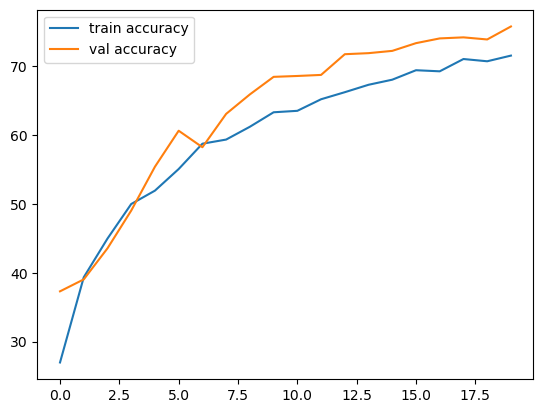

In [22]:
history = load_train_outputs('../../log/YOLOv8cls-version-5/training/')['history']
plot_accuracy(history)